<h2 align='center'> Tugas Minggu 9 Deep Learning </h2>
<br>
<hr>
<br>
Nama: Muh. Yusuf Syam
<br>
NIM: H071191044
<br>
Soal: Mekanisme attention, dan Transformer

Attention adalah mekanisme deep learning yang memutuskan bagian mana yang perlu difokuskan dan bagian mana yang harus diabaikan. Seperti neural network, attention juga meniru cara kerja otak manusia yang mengabaikan sebagian besar informasi yang diterima, dan hanya memperhatikan proporsi kecil dari informasi yang dianggap penting, misalnya saat seseorang membaca buku, ia hanya fokus pada kata atau kalimat yang sedang ia baca, bukan pada keseluruhan buku.

Sementara Transformer merupakan model deep learning yang komponen utamanya merupakan multi-head attention (varian dari attention).

# Attention

Awalnya attention didesain untuk permasalahan menerjemahkan bahasa. Penerjemahan bahasa awalnya menggunakan model rnn Seq2Seq (sequence to sequence), model yang menerima input sequence dan mengeluarkan output berbentuk sequence juga. Model Seq2Seq normalnya berupa pasangan encoder dan decoder, encoder merupakan RNN (bisa juga merupakan LSTM atau GRU) yang bertugas menerima input dan merangkum keseluruhan input dalam context vector/encode vector yang berukuran fixed. Context vector inilah yang digunakan sebagai initial hidden state dari decoder, yang bertugas mengeluarkan output.

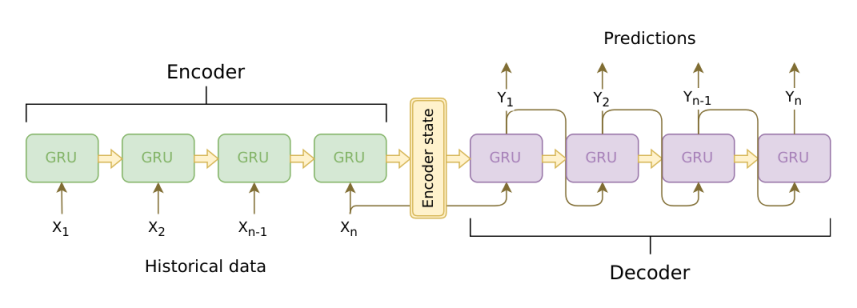

Namun model rnn Seq2Seq hanya efektif digunakan pada sequence yang pendek, kalimat berisi 4-5 kata misalnya, namun jika kita memaksa menggunakan model ini untuk sequence yang besar, misalnya pada satu paragraf atau keseluruhan buku novel, maka model ini akan kesulitan dalam menyimpan informasi-informasi di awal sequence, bukan hanya itu, karena model ini memaksakan informasi yang sangat besar pada satu context vector, maka context vector tersebut kesusahan untuk menyimpan semua informasi yang diterima (bottleneck).
<br>
<br>
Untuk mengatasi masalah-masalah tersebut diciptakanlah attention.

### Cara Kerja Attention

Attention tetap mengimplementasikan model encoder-decoder walaupun melakukan sedikit modifikasi. Berikut cara kerja dari attention.

**Iterasi ke-0**

Pada cara kerja attention, kita asumsikan proses encoding telah selesai (karena proses encodingnya sama dengan model Seq2Seq biasa). Proses encoding (menerima input berupa text, embedding, lalu mendapatkan hidden state terakhir) hanya dilakukan sekali, namun untuk simplicity perhitungan context vector dilakukan berdekatan dengan encoder.
<br>
<br>
Misal pada kasus translate kata 'we are eating bread' dari bahasa inggris ke bahasa prancis. Hal pertama yang dilakukan adalah menghitung context vector.

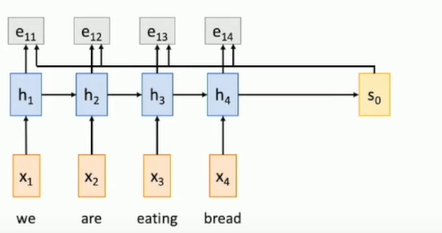

Di mana x merupakan input, h merupakan hidden state dari masing-masing input sequence, s0 merupakan hidden state dari iterasi sebelumnya, karena kita berada pada iterasi ke-0, maka kita menggunakan hidden state terakhir dari encoder, s0 bisa juga disebut query. 
<br>
<br>
Kita juga bisa melihat variabel baru yaitu vektor e yang merupakan similiarity score/skor kedekatan dari hidden state ke-i dengan context vector saat ini. Skor kedekatan didapatkan dari fungsi kesamaan (bisa merupakan feed forward FCN, dot product, cosine similiarity, dll). fungsi kesamaan ini akan mengeluarkan output berupa skalar. 
<br>
<br>
Jadi pertama-tama kita mengaplikasikan fungsi kesamaan dari query ke-0 ke setiap hidden state dari encoder, output skalar dari setiap output fungsi kesamaan disatukan di vektor e

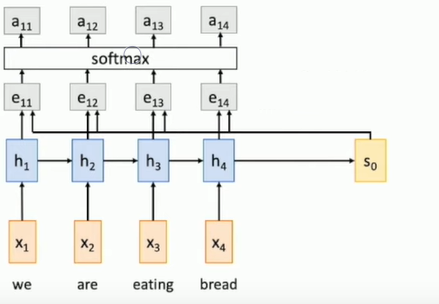

Selanjutnya diaplikasikan fungsi softmax pada vektor e, operasi ini membuat vektor e berubah menjadi probability distribution a yang elemennya berkisar antara 0-1, a inilah yang berperan sebagai bobot/weight.

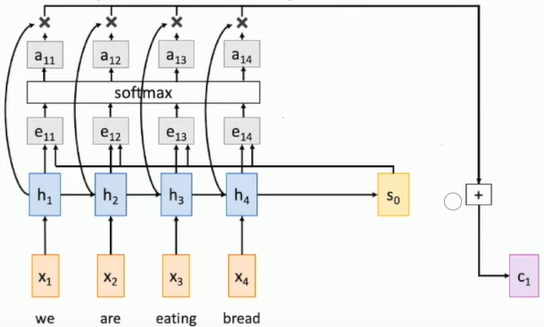

Setelah itu masing-masing vektor a dikalikan lagi dengan h (hidden state) pada indeks yang sama. Karena a merupakan probability distribution yang berkisar antara [0,-1], itu berarti semakin tinggi a-i, membuat h-i mempunyai pengaruh yang lebih kuat atau mendapatkan lebih banyak perhatian dari h yang lain.
<br>
<br>
Hasil dari perkalian bobot tersebut lalu dijumlahkan, artinya indeks ke-0 dari setiap h dijumlahkan lalu ditempatkan pada indeks ke-0 dari context vector yang baru, dst. Sekarang kita telah mendapatkan context vector yang baru.

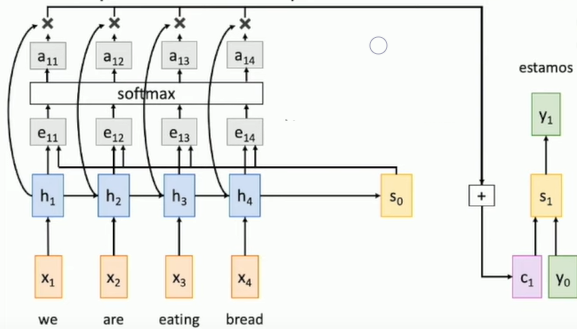

Setelah mendapatkan context vector, barulah kita melanjutkan proses untuk mengeluarkan output di decoder. Untuk melakukan decoding kita membutuhkan context vector dan output dari iterasi sebelumnya, namun karena kita berada pada iterasi ke-0, kita akan menginput token START_ sebagai gantinya, yang memberitahu decoder untuk menggenerate output baru hanya berdasarkan context vector. Setelah itu barulah decoder mengeluarkan output pertama yaitu kata estamos (yang artinya 'we are').

**Iterasi 1-selesai**

Iterasi selanjutnya sampai selesai hampir tidak berbeda dari iterasi ke-0. Perbedaannya terletak pada perhitungan context vector yang menggunakan hidden state dari output sebelumnya (bukan yang berasal dari encoder), pada iterasi kali ini juga menggunakan output dari iterasi sebelumnya (kata estamos) sebagai input. Saat decoder mendapatkan context state dan input, maka pemrosesan output sama dengan rnn biasa.

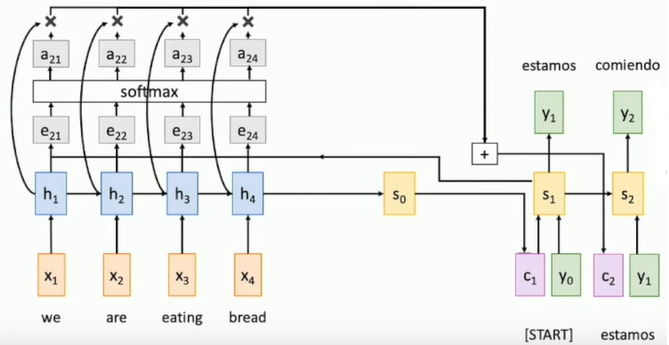

Dst.
.
.

Begini tampilan decoder saat iterasi selesai.

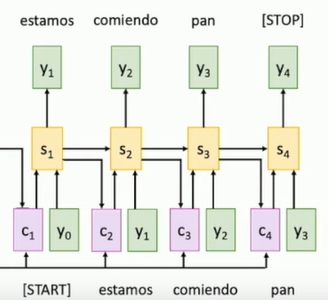

Saat iterasi selesai terdapat token yang lain yaitu STOP/END, yang memberhentikan proses decoding. Attention tau kapan dan di mana untuk menempatkan token STOP karena telah di-train sebelumnya.

### Attention Layer

Attention dalam neural net bisa berupa layer, yang menerima query, key dan value.

**Query, Key dan Value**

Dalam attention, terdapat istilah query, key dan value.
* Query: Vektor yang berisi query, dalam kasus attention yaitu hidden state yang berasal dari output iterasi sebelumnya (di decoder).
* Input vektor: Hidden state dari setiap iterasi pada encoder. Kita menggunakan input vektor dua kali saat per proses decoding:
    * Key: Hidden state yang dikalikan dengan query saat ingin mendapatkan bobot.
    * Value: Hidden state yang dikalikan dengan bobot untuk mendapatkan context vector

Berikut visualisasi dari layer attention, di mana:
* X = input vector
* K = key vector
* V = value vector
* Q = Query vector (di setiap iterasi)
* Y = Output


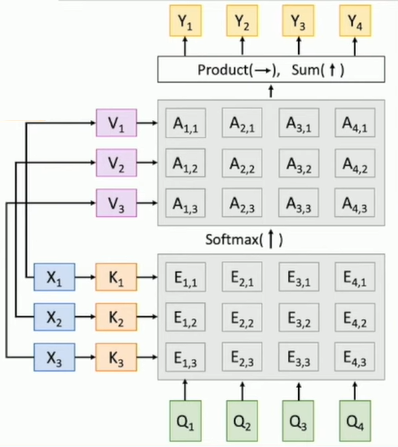

### Self-attention

Self-attention merupakan varian dari attention. Perbedaan utama dari self-attention (SA) dan attention (AT) yaitu SA tidak lagi memiliki struktur encoder-decoder, SA melakukan encoding dan decoding sekaligus (bukan lagi secara sequential). Untuk melakukan encoding SA juga sudah tidak menggunakan RNN, SA alih-alih mengimplementasikan mekanisme attention untuk encoding. Terdapat beberapa perbedaan lagi dari SA dan AT:

**Query, Key dan Value**

Query, key dan value dari self-attention mempunyai sumber yang sama yaitu input vektor (X), berikut ilustrasi dari SA layer.

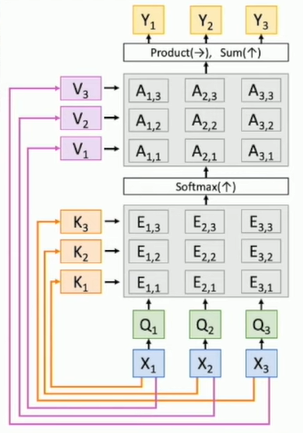

Namun seperti yang kita tau, query, key dan value mempunyai fungsionalitas yang berbeda-beda. Maka dari itu setiap query, key dan value memiliki weight dan bias nya masing-masing yang bersifat trainable, namun kita juga dapat melakukan transformasi pada query, key dan value dengan fungsi (fixed) yang predefined.

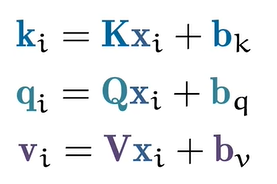

Output ke-i dari self attention merupakan vektor yang menunjukkan similiarity/kesamaan antara input index-i dengan keseluruhan input.

**Positional Encoding**

Seperti yang telah dijelaskan sebelumnya, SA tidak lagi melakukan encoding secara sequential, maka dari itu bagaimana SA tau urutan kata dan konteks dari setiap kata dari sebuah kalimat? Jawabannya adalah positional encoding. Positional encoding mempunyai bentuk dan fungsi yang mirip dengan word embedding, positional encoding merupakan vector yang dikalikan ke masing-masing input (masing-masing input memiliki positional encoder yang berbeda-beda), hasil dari perkalian inilah yang berisi informasi input serta konteksnya dalam kalimat. Dalam ilustrasi di bawah, positional encoding disimbolkan sebagai E.

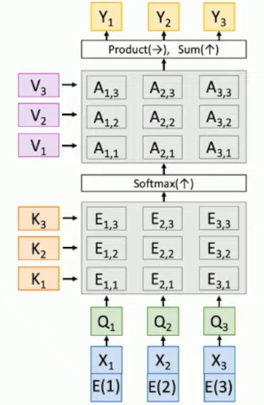

Positional encoder ditempatkan setelah word embedding dan sebelum input vector.

**Kesimpulan dari self-attention**

* Proses komputasi SA lebih efisien karena bisa dilakukan secara paralel.
* Model SA lebih baik untuk memodelkan dependensi/ketergantungan antara beberapa bagian dalam sequence (misalnya kata-kata dalam kalimat), AT di sisi lain lebih memodelkan dependensi antara satu sequence dengan sequence lain (misalnya suatu kalimat dengan kalimat terjemahannya di bahasa lain).
* SA dapat diterapkan berkali-kali secara independen dalam satu model (misalnya 18 kali di Transformer, 12 kali di BERT BASE) sementara AT biasanya diterapkan sekali dalam model dan menghubungkan beberapa komponen (misalnya encoder dan decoder).
* SA bukan cuma bisa diaplikasikan pada model seq2seq, misalnya pada seq2vec (input sequence output vector) 

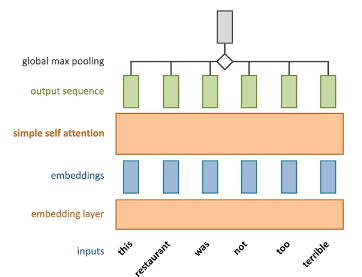

### Multi-head attention

Multi-head attention merupakan varian dari attention di mana kita memisah SA menjadi h bagian, lalu menjalankan h SA yang telah dibagi secara terpisah dan secara paralel. Misal h=3 , maka kita memisah SA menjadi 3 bagian (struktur SA tetap tidak berubah)

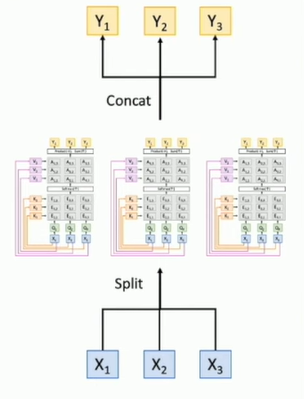

Misal dimensi dari X adalah d, dan h=3, maka yang kita pass ke self-attention layer adalah masing-masing x yang telah dibagi menjadi 3 bagian (X indeks d/3)

# Transformer